In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=2)

In [126]:
file = 'houses.csv'

In [127]:
# load dataset
df = pd.read_csv(f'data/{file}')
print(df.shape)
to_predict = df.columns[-1]

# drop the rows with missing values
df = df.fillna(df.mean(numeric_only=True))

target = df[[to_predict]]
predictors = df.drop(to_predict, axis=1).select_dtypes(exclude=object)

X_train, X_test, y_train, y_test = train_test_split(predictors, target, train_size=0.7, test_size=0.3)
y_train = y_train.values.ravel()

(100, 5)


In [128]:
print(X_train.shape)
print(y_train.shape)

(70, 4)
(70,)


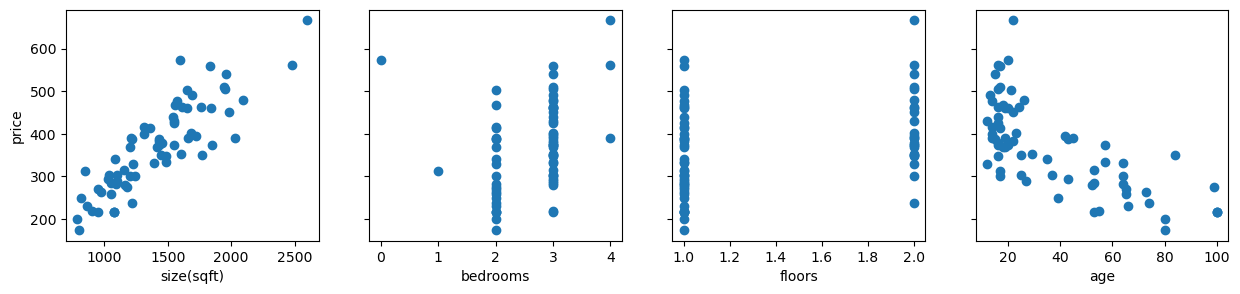

In [129]:
# plot the data
X_train = pd.DataFrame(X_train, columns=predictors.columns)
fig, ax = plt.subplots(1, X_train.shape[1], figsize=(15, 3), sharey=True)

if (X_train.shape[1] == 1):
  ax = [ax]

for i in range(X_train.shape[1]):
  ax[i].scatter(X_train.iloc[:,i], y_train)
  ax[i].set_xlabel(X_train.columns[i])
  
ax[0].set_ylabel(to_predict)

plt.show()

In [130]:
# scale/normalize data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
print(f'Peak to peak range by column in Raw Data        X: {np.ptp(X_train, axis=0)}')
print(f'Peak to peak range by column in Normalized Data X: {np.ptp(X_norm, axis=0)}')

Peak to peak range by column in Raw Data        X: size(sqft)    1811.0
bedrooms         4.0
floors           1.0
age             88.0
dtype: float64
Peak to peak range by column in Normalized Data X: [4.68 6.08 2.09 3.43]


In [131]:
# create and fit the regression model
model = SGDRegressor(max_iter=1000)
model.fit(X_norm, y_train)

print(f'number of iterations completed: {model.n_iter_}, number of weight updates: {model.t_}')

number of iterations completed: 203, number of weight updates: 14211.0


In [132]:
# view model parameters
b_norm = model.intercept_
w_norm = model.coef_

print(f'model parameters: w: {w_norm}, b: {b_norm}')

model parameters: w: [101.21 -21.82 -29.66 -39.2 ], b: [368.09]


In [133]:
# evaluate model accuracy on test set
y_pred = model.predict(X_test_norm)
print(f'accuracy: {model.score(X_test_norm, y_test)*100:0.2f}%%')

accuracy: 95.76%%


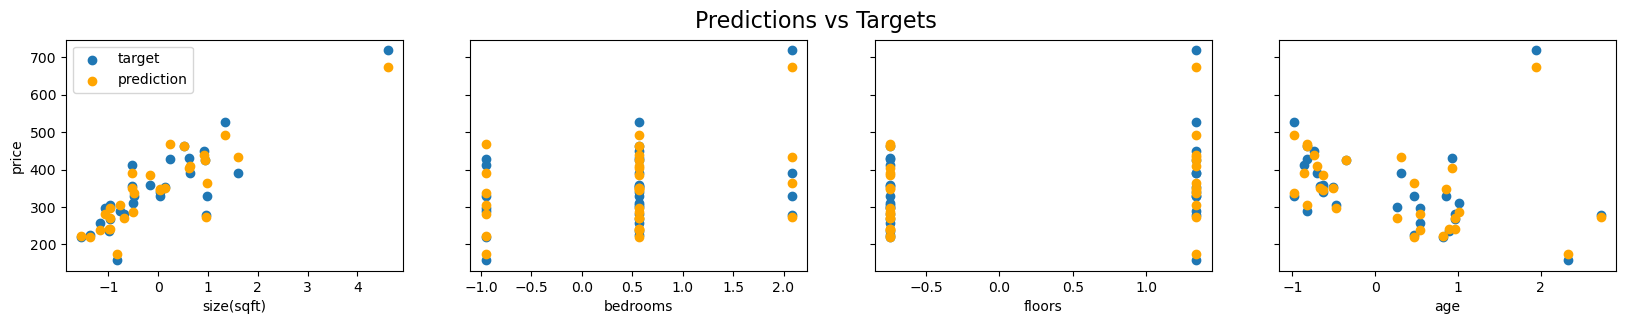

In [134]:
# plot predictions and targets vs original features
y_pred = model.predict(X_test_norm)

fig, ax = plt.subplots(1, X_test_norm.shape[1], figsize=(20,3), sharey=True)
if X_test_norm.shape[1] == 1: ax = [ax]
for i in range(X_test_norm.shape[1]):
  ax[i].scatter(X_test_norm[:,i], y_test, label='target')
  ax[i].set_xlabel(predictors.columns[i])
  ax[i].scatter(X_test_norm[:,i], y_pred, color = 'orange', label='prediction')
ax[0].set_ylabel(target.columns[0])
ax[0].legend()

fig.suptitle('Predictions vs Targets', fontsize=16)
plt.show()